In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


In [18]:

df_train = pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\train_data.txt", delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_11720\2781180943.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\train_data.txt", delimiter=':::')


In [19]:
df_test=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data.txt",delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_11720\1560589076.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data.txt",delimiter=':::')


In [20]:
df_test.columns=['S.No','Movie','Description']

In [21]:
df_test.head()

,S.No,Movie,Description
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [22]:
df_train.columns=['S.No','Movie','Gnere','Description']
df_train.head()

,S.No,Movie,Gnere,Description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [23]:
df_train.shape

(54213, 4)

In [24]:
df_train.isnull().sum()

S.No           0
Movie          0
Gnere          0
Description    0
dtype: int64

In [25]:
gnere_counts=df_train['Gnere'].value_counts()
gnere_counts_df=gnere_counts.reset_index()
gnere_counts_df.columns=['Gnere','Count']
gnere_counts_df


,Gnere,Count
0,drama,13612
1,documentary,13096
2,comedy,7447
3,short,5073
4,horror,2204
5,thriller,1591
6,action,1315
7,western,1032
8,reality-tv,884
9,family,784


In [26]:
df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')

C:\Users\gaura\AppData\Local\Temp\ipykernel_11720\1208129856.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')


<BarContainer object of 27 artists>

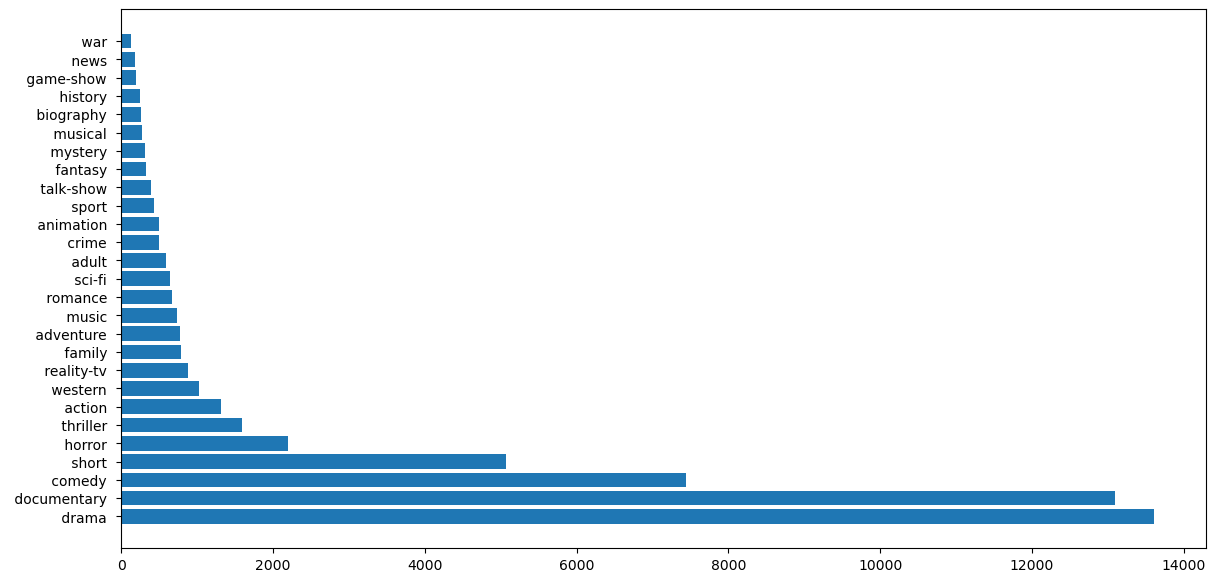

In [27]:
fig,ax=plt.subplots(figsize=(14,7))
plt.barh(gnere_counts_df['Gnere'],gnere_counts_df['Count'])


In [28]:
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)    

In [29]:
df_train['Description_Preprocessed']=df_train['Description'].apply(preprocess)

In [30]:
df_test['Description_Preprocessed']=df_test['Description'].apply(preprocess)

In [31]:
df_train.head(2)

,S.No,Movie,Gnere,Description,Description_Preprocessed
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip Museum Natural ...


In [32]:
df_test.head()

,S.No,Movie,Description,Description_Preprocessed
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",Spain March 1964 Quico naughty child belong ...
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life Albin family shepherd North Transy...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die speak brother 10 year cancer Dieg...
3,5,Er nu zhai (1955),Before he was known internationally as a mart...,know internationally martial art superstar B...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,Emily Burns hold captive room idea get deter...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()

In [34]:
X_train=v.fit_transform(df_train['Description_Preprocessed'])

In [35]:
X_train.shape

(54213, 110378)

In [36]:
X_test=v.transform(df_test['Description_Preprocessed'])

In [37]:
X_test.shape

(54199, 110378)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Gnere_num'] = le.fit_transform(df_train['Gnere'])


In [39]:
df_train.head()

,S.No,Movie,Gnere,Description,Description_Preprocessed,Gnere_num
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship ...,24
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip Museum Natural ...,1
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father end meet Edith twin s...,8
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refer un recover body ground zero...,8
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,Quality Control consist series 16 mm single ...,7


In [42]:
df_test_sol=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')
df_test_sol.columns=['S.No','Movie','Gnere','Description']
df_test_sol.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_11720\3301074659.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test_sol=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (5)\\Genre Classification Dataset\\test_data_solution.txt",delimiter=':::')


,S.No,Movie,Gnere,Description
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test_sol['Gnere_num']=le.fit_transform(df_test_sol['Gnere'])
df_test_sol.head()

,S.No,Movie,Gnere,Description,Gnere_num
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",5
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,7
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",8
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,8
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...,13


In [44]:
df_train.isnull().sum()

S.No                        0
Movie                       0
Gnere                       0
Description                 0
Description_Preprocessed    0
Gnere_num                   0
dtype: int64

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [46]:
y_train=df_train['Gnere_num']

In [47]:
clf.fit(X_train,df_train['Gnere_num'])

MultinomialNB()

In [48]:
y_pred=clf.predict(X_test)

In [49]:
clf.predict(X_test[:10])

array([8, 7, 8, 8, 8, 8, 8, 7, 7, 8])

In [50]:
print(classification_report(df_test_sol['Gnere_num'],y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.72      0.05      0.09      7446
           6       0.00      0.00      0.00       505
           7       0.51      0.89      0.65     13096
           8       0.38      0.87      0.53     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       1.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       318
          17       0.00    

c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gaura\anaconda3\envs\tfnew\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_train,y_train)

In [53]:
clf.fit(X_resampled,y_resampled)

MultinomialNB()

In [54]:
y_pred=clf.predict(X_test)

In [55]:
print(classification_report(df_test_sol['Gnere_num'],y_pred))

              precision    recall  f1-score   support

           0       0.34      0.47      0.40      1314
           1       0.43      0.63      0.51       590
           2       0.29      0.27      0.28       775
           3       0.27      0.26      0.26       498
           4       0.03      0.06      0.04       264
           5       0.61      0.46      0.52      7446
           6       0.14      0.26      0.18       505
           7       0.73      0.64      0.68     13096
           8       0.67      0.46      0.55     13612
           9       0.22      0.27      0.24       783
          10       0.16      0.24      0.19       322
          11       0.71      0.71      0.71       193
          12       0.09      0.17      0.12       243
          13       0.50      0.71      0.58      2204
          14       0.35      0.74      0.47       731
          15       0.16      0.19      0.18       276
          16       0.11      0.13      0.12       318
          17       0.21    

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial',max_iter=2000)
lr.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [57]:
y_pred1=lr.predict(X_test)

In [58]:
print(classification_report(df_test_sol['Gnere_num'],y_pred1))

              precision    recall  f1-score   support

           0       0.35      0.48      0.41      1314
           1       0.49      0.58      0.53       590
           2       0.31      0.34      0.32       775
           3       0.26      0.22      0.24       498
           4       0.06      0.03      0.04       264
           5       0.58      0.57      0.58      7446
           6       0.18      0.24      0.21       505
           7       0.76      0.70      0.73     13096
           8       0.66      0.56      0.60     13612
           9       0.22      0.29      0.25       783
          10       0.21      0.26      0.24       322
          11       0.72      0.68      0.70       193
          12       0.12      0.12      0.12       243
          13       0.59      0.65      0.62      2204
          14       0.46      0.68      0.55       731
          15       0.21      0.24      0.22       276
          16       0.15      0.13      0.14       318
          17       0.34    